In [2]:
#Import modules

from codecs import open
import math 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, multilabel_confusion_matrix
import scikitplot as skplt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import seaborn as sns
from __future__ import division
from sklearn.model_selection import cross_val_score

ModuleNotFoundError: ignored

In [3]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
# Define a fuction to read the documnets 
def read_doc(doc):
  documents = []
  labels = []
  with open(doc, 'r', encoding='utf-8') as ft:
    for line in ft:
      words = line.strip().split()
      if len(words) > 3:
        documents.append(words[3:])
        labels.append(words[1])
  return documents, labels

In [6]:
# Read the document from the file

documents, labels = read_doc('/content/sample_data/all_sentiment_shuffled.rtf')

In [ ]:
# Print the content in the documents
documents

In [8]:
def documentsToText(doc):
  texts =[]
  for doc in doc:
    str = ""
    for element in doc:
      string = " "+element
      str += string
    texts.append(str)
  return texts

In [9]:
texts = documentsToText(documents)

In [ ]:
texts

In [14]:
# Convert the text and labels into dataframe
import pandas as pd

tempdict = {'Text':texts, 'Senti': labels}
data = pd.DataFrame(tempdict)


In [15]:
data

,Text,Senti
0,i bought this album because i loved the title...,neg
1,i was misled and thought i was buying the ent...,neg
2,"i have introduced many of my ell , high schoo...",neg
3,anything you purchase in the left behind seri...,pos
4,"i loved these movies , and i cant wiat for th...",pos
...,...,...
11909,the story here dose n't matter . the main cha...,neg
11910,i liked everything about this product except ...,pos
11911,this flash is the perfect back-up for a studi...,pos
11912,i had boughten this as a gift which turned ou...,neg


In [16]:
# Mapping the sentiment label to binary values
df = data.copy()
df['Senti'] = df['Senti'].map({'pos':1, 'neg':0})



In [17]:
df

,Text,Senti
0,i bought this album because i loved the title...,0
1,i was misled and thought i was buying the ent...,0
2,"i have introduced many of my ell , high schoo...",0
3,anything you purchase in the left behind seri...,1
4,"i loved these movies , and i cant wiat for th...",1
...,...,...
11909,the story here dose n't matter . the main cha...,0
11910,i liked everything about this product except ...,1
11911,this flash is the perfect back-up for a studi...,1
11912,i had boughten this as a gift which turned ou...,0


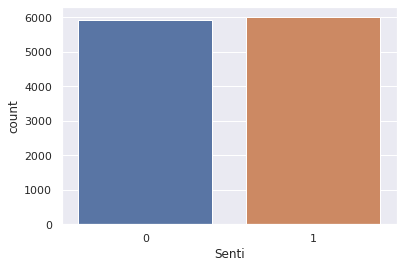

In [44]:
# Visual for datast imbalance 
import seaborn as sns
sns.set_theme(style="darkgrid")
sns.countplot( x = 'Senti' , data = df )

In [45]:
df['Senti'].value_counts()

1    6000
0    5914
Name: Senti, dtype: int64

In [46]:
# To sort the text add the length column to the dataframe
data['length'] = data['Text'].str.len() 
data = data.sort_values(['length'], ascending=True)
data = data.dropna()
data.head(10)

,Text,Senti,length
11471,goo \,pos,6
4976,terrib \,neg,9
1289,2nd time . \,neg,13
1190,it 's a beu \,pos,14
6863,you all like misogynist comics \,neg,33
10716,all i have to say is great album \,pos,35
10890,it 's not great music to dance to \,neg,36
1972,"stick to singing in spanish , shak \",pos,37
1751,all i can say is you must try this ! \,pos,39
11656,received qickly and in great condition \,pos,41


In [51]:
# Collecting 80% sample for training

df_train = data.sample(frac=0.8)

In [19]:
# Collecting 20% sample for text

df_test = data.sample(frac=0.2)

In [20]:
df_test['Senti'].value_counts()

pos    1210
neg    1173
Name: Senti, dtype: int64

In [54]:
df_train

,Text,Senti,length
8666,okay for the time being but not enough . need...,pos,105
1144,leah stewart is a talented writer . i read th...,pos,632
10416,it never worked as advertised and total quit ...,neg,113
4802,"as much as i hear time and again that "" mindc...",pos,1996
9033,"from reading the other reviews , i seem to be...",neg,753
...,...,...,...
245,this is a good software for casual use ( hiki...,pos,2232
11235,i had an old caruso molecular setter that fin...,neg,541
10235,terrible product . printer jams repeatedly or...,neg,1212
1797,"when i received this dvd , i played it on my ...",neg,553


In [50]:
df_test

,Text,Senti,length
5066,"this movie is very simple , and unique . it '...",pos,625
2834,because the camera eye moves only in one dire...,neg,403
7789,product does not generate enough heat to prov...,neg,215
10794,have n't had to clean it yet and it keeps the...,pos,206
4340,i get this stuff for my husband . he 's got r...,pos,179
...,...,...,...
8845,the adorama silica gel came without any instr...,neg,471
10526,i did n't listen the disk but know the record...,neg,219
4524,if i had saved the box i would have returned ...,neg,279
388,absolutely unwatchable . cliche-ridden . so s...,neg,454


In [61]:
# Using Naviebayes for sentiment analysis
nb_pipe = Pipeline([
                ('vector_count', CountVectorizer()),
                ('tfidf_trans', TfidfTransformer()),
                ('gnb_multi', MultinomialNB()),
                ])

In [62]:
#Model Training using the created pipeline

nb_classifier = nb_pipe.fit(df_train['Text'], df_train['Senti'])

In [69]:
# class label prediction  
df_test['Pred'] = nb_classifier.predict(df_test['Text'])
y_test= df_test['Senti']
y_pred = df_test['Pred']
target = ['negative', 'positive']

In [76]:
def cross_validation(params, model, X_train, y_train):
    model = model

    cv_results = cross_val_score(model, X_train, y_train,
                             cv = 10, #10 folds
                             scoring = "accuracy",
                             verbose = 2
                            )
    #return the mean of the 10 fold cross validation
    return cv_results.mean()

#baseline parameters
params = {
          "priors" : "None",
          "var_smoothing" : 1e-9
}
#create an list of var_smoothing to cross validate
steps = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4]

#will contain the cv results
results = []
for step in steps:        
    params["var_smoothing"] = step        
    cv_result = cross_validation(params, nb_classifier, df_train['Text'], df_train['Senti'])

    #save result
    results.append(cv_result)

#print results
#convert results to pandas dataframe for easier visualization
df = pd.DataFrame({"var_smoothing" : steps, "accuracy" : results})
#sort it
df_sorted = df.sort_values("accuracy", ascending=False)
#reset the index of the sorted dataframe
df_sorted.reset_index(inplace=True, drop=True)
df_sorted.head()

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.2s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.6s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   11.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] END .................................................... total time=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s
[CV] END .................................................... total time=   1.1s
[CV] END .................................................... total time=   1.0s


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.6s finished


,var_smoothing,accuracy
0,1.000000e-08,0.821635
1,1.000000e-07,0.821635
2,1.000000e-06,0.821635
3,1.000000e-05,0.821635
4,1.000000e-04,0.821635


              precision    recall  f1-score      support
negative       0.888078  0.922494  0.904959  1187.000000
positive       0.920000  0.884615  0.901961  1196.000000
accuracy       0.903483  0.903483  0.903483     0.903483
macro avg      0.904039  0.903555  0.903460  2383.000000
weighted avg   0.904099  0.903483  0.903454  2383.000000
 
 


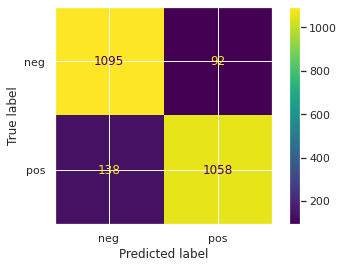

In [79]:
# Confusion Matrix
nb_results = classification_report(y_test, y_pred, target_names=target, output_dict=True)
results = pd.DataFrame(nb_results).transpose()
print(results)

cm = confusion_matrix(y_test, y_pred, labels=nb_classifier.classes_)
print(" ")
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nb_classifier.classes_)
print(" ")
disp.plot()
plt.show()